In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from os import walk
from tqdm import tqdm
import pysam
from Bio.Seq import Seq

In [2]:
import json
f = open('/home/mark/Desktop/chromosome_y/json_dict/HG00358_cluster.json') 
T2T_dict = json.load(f) 

In [3]:
T2T_startStopDict = {key:[] for key in T2T_dict.keys()}
for key in T2T_startStopDict.keys():
    T2T_startStopDict[key].append(T2T_dict[key][0][0].split(" ")[6].strip())
    T2T_startStopDict[key].append(T2T_dict[key][-1][-1].split(" ")[7].strip())

In [4]:
T2T_startStopDict

{'0': ['27647271', '27681004'],
 '1': ['28134346', '28193299'],
 '2': ['28269110', '28311846'],
 '3': ['29667814', '29827779'],
 '4': ['30233067', '30248931'],
 '5': ['30319502', '30425221'],
 '6': ['30987114', '31231791'],
 '7': ['32331911', '32598387'],
 '8': ['33269771', '33433583'],
 '9': ['34221584', '34589430'],
 '10': ['35074600', '35274609'],
 '11': ['35736974', '36560415'],
 '12': ['36935805', '37071714'],
 '13': ['37492673', '37725309'],
 '14': ['38017448', '38589567'],
 '15': ['38938331', '39009088'],
 '16': ['39394595', '39661003'],
 '17': ['39839772', '40785999'],
 '18': ['42069305', '42371987'],
 '19': ['42568453', '43536449'],
 '20': ['44659418', '45199374'],
 '21': ['45526625', '45878964'],
 '22': ['46318273', '46553810'],
 '23': ['46845297', '47319943'],
 '24': ['47540341', '47834691'],
 '25': ['48380946', '48819496'],
 '26': ['49438525', '49925963'],
 '27': ['50474735', '50956378'],
 '28': ['51498053', '51975772'],
 '29': ['52511283', '53006148'],
 '30': ['53262206', 

In [5]:
samtools='temp'

with open('/home/mark/Desktop/chromosome_y/assemblies/repeatmasker/postMay232022/finalized/HG00358_finalized.txt') as f:
    Lines = f.readlines()
    myLines = []
    lineNum = 0

    for line in tqdm(Lines): 
        
        goodLine = ' '.join(line.split())
        samtools=goodLine.split(" ")[5]
        myLines.append(goodLine)

100%|█████████████████████████████████| 27925/27925 [00:00<00:00, 397367.10it/s]


In [6]:
myLines2 = myLines.copy()
myLines3 = myLines.copy()

In [7]:
NRB_Blocks={}
i = 0
firstFlag = 0
keyList = list(T2T_startStopDict.keys())
myKey = 0

for key in tqdm(keyList):
    
    if firstFlag == 0:
    
        NRB_Blocks[key]=str(26322870)+"-"+str(int(T2T_startStopDict[key][0])-1)

        firstFlag=1
        myKey+=1
                
    else:
        
        NRB_Blocks[key]=str(int(T2T_startStopDict[str(int(key)-1)][1])+1)+"-"+str(int(T2T_startStopDict[key][0])-1)
            

100%|███████████████████████████████████████| 42/42 [00:00<00:00, 233016.89it/s]


In [8]:
NRB_Blocks.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41'])

In [9]:
import collections
templist = []

for key in list(NRB_Blocks.keys())[:-3]:
    templist.append([key, 'Spacer Block', (int(NRB_Blocks[key].split("-")[1])-int(NRB_Blocks[key].split("-")[0]))+1, int(NRB_Blocks[key].split("-")[0]), int(NRB_Blocks[key].split("-")[1])])
    templist.append([key, 'Repeat Block', (int(T2T_startStopDict[key][1])-int(T2T_startStopDict[str(key)][0]))+1, int(T2T_startStopDict[key][0]), int(T2T_startStopDict[key][1])])
    
tempDF = pd.DataFrame(data=templist, columns=['Block_Number','Block_Type','Length','Start','End'])
tempDF['SampleName']='HG00358'

In [10]:
tempDF

,Block_Number,Block_Type,Length,Start,End,SampleName
0,0,Spacer Block,1324401,26322870,27647270,HG00358
1,0,Repeat Block,33734,27647271,27681004,HG00358
2,1,Spacer Block,453341,27681005,28134345,HG00358
3,1,Repeat Block,58954,28134346,28193299,HG00358
4,2,Spacer Block,75810,28193300,28269109,HG00358
...,...,...,...,...,...,...
73,36,Repeat Block,80976,57892582,57973557,HG00358
74,37,Spacer Block,260504,57973558,58234061,HG00358
75,37,Repeat Block,13737,58234062,58247798,HG00358
76,38,Spacer Block,199597,58247799,58447395,HG00358


In [11]:
#Pull the sequences for the spacer blocks (This is for RepeatMasker)
#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG00358/HG00358_spacerSequences_cleaned.fasta', 'a+') as file:
    for row in tempDF.index:
        if str(tempDF.at[row,'Block_Type']) == 'Spacer Block':
            file.write(">"+str(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HG00358.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:"+str(tempDF.at[row,'Start'])+"-"+str(tempDF.at[row,'End'])).split("\n")[0]).split("utig4-2510.")[1])
            file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HG00358.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:"+str(tempDF.at[row,'Start'])+"-"+str(tempDF.at[row,'End'])).split(str(tempDF.at[row,'End']))[1])
        else:
            continue

file.close()

In [12]:
#Pull the sequences for the spacer blocks
#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG00358/HG00358_spacerSequences.fasta', 'a+') as file:
    for row in tempDF.index:
        if str(tempDF.at[row,'Block_Type']) == 'Spacer Block':
            file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HG00358.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:"+str(tempDF.at[row,'Start'])+"-"+str(tempDF.at[row,'End'])))
        else:
            continue

file.close()

## Load in HaeIII Restriction Data

In [2]:
#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG00358/HG00358_digestion.fasta', 'r') as file:
    with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG00358/HG00358_digestion_cleaned.fasta', 'a+') as file2:
        Lines = file.readlines()
        for line in tqdm(Lines):
            if ">" in line:
                start=int(line.split("HG00358:")[1].split(",")[0].split("-")[0]) 
                cord1=int(line.split("base")[1].split(" ")[1])
                cord2=int(line.split("base")[2].split(" ")[1])
                file2.write(">HG00358:"+str(start+cord1)+"-"+str(start+cord2)+'\n')
            else:
                file2.write(line)
    file2.close()
file.close()


100%|██████████████████████████████| 338800/338800 [00:00<00:00, 1073345.64it/s]


In [11]:
spacerDictionary = {}
for key in NRB_Blocks.keys():
    spacerDictionary[str(samtools)+":"+str(NRB_Blocks[key])]=key
    #spacerDictionary["HC02666:"+str(NRB_Blocks[key])]=key
spacerDictionary

{'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0001094.HG00358:26322870-27647270': '0',
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0001094.HG00358:27681005-28134345': '1',
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0001094.HG00358:28193300-28269109': '2',
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0001094.HG00358:28311847-29667813': '3',
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0001094.HG00358:29827780-30233066': '4',
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0001094.HG00358:30248932-30319501': '5',
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0001094.HG00358:30425222-30987113': '6',
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0001094.HG00358:31231792-32331910': '7',
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0001094.HG00358:32598388-33269770': '8',
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0001094.HG00358:33433584-34221583': '9',
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0001094.HG00358:34589431-35074599': '10',
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0001094.HG00358:35274610-35736973': '11',
 'chrY.01-24.01.PAR1-PAR2.

In [12]:
spacerDictionary2 = {}
for key in NRB_Blocks.keys():
    spacerDictionary2["HG00358:"+str(NRB_Blocks[key])]=key
spacerDictionary2

{'HG00358:26322870-27647270': '0',
 'HG00358:27681005-28134345': '1',
 'HG00358:28193300-28269109': '2',
 'HG00358:28311847-29667813': '3',
 'HG00358:29827780-30233066': '4',
 'HG00358:30248932-30319501': '5',
 'HG00358:30425222-30987113': '6',
 'HG00358:31231792-32331910': '7',
 'HG00358:32598388-33269770': '8',
 'HG00358:33433584-34221583': '9',
 'HG00358:34589431-35074599': '10',
 'HG00358:35274610-35736973': '11',
 'HG00358:36560416-36935804': '12',
 'HG00358:37071715-37492672': '13',
 'HG00358:37725310-38017447': '14',
 'HG00358:38589568-38938330': '15',
 'HG00358:39009089-39394594': '16',
 'HG00358:39661004-39839771': '17',
 'HG00358:40786000-42069304': '18',
 'HG00358:42371988-42568452': '19',
 'HG00358:43536450-44659417': '20',
 'HG00358:45199375-45526624': '21',
 'HG00358:45878965-46318272': '22',
 'HG00358:46553811-46845296': '23',
 'HG00358:47319944-47540340': '24',
 'HG00358:47834692-48380945': '25',
 'HG00358:48819497-49438524': '26',
 'HG00358:49925964-50474734': '27',
 '

In [13]:
SpacerBlocks={x:[] for x in spacerDictionary.values()}
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG00358/HG00358_Headers.txt') as f:
    Lines = f.readlines()
    
    for line in tqdm(Lines):
        SpacerBlocks[spacerDictionary2[line.split(".utig4-2510.")[1].split(",")[0]]].append(str(line.split(" ")[0].split(">")[1])+"_"+str(int(line.split(" ")[7].split(",")[0].split(":")[1].split("-")[0])+int(line.split(" ")[9]))+"-"+str(int(line.split(" ")[7].split(",")[0].split(":")[1].split("-")[0])+int(line.split(" ")[12])))
    f.close()
SpacerBlockList = []
for key in SpacerBlocks.keys():
    for item in SpacerBlocks[key]:
        SpacerBlockList.append([int(key), int(item.split("_")[0]), int(item.split("_")[1].split("-")[0]), int(item.split("_")[1].split("-")[1])])

        tempDF = pd.DataFrame(data=SpacerBlockList, columns=['SpacerBlock','Length','Start','End'])
group = tempDF.groupby("SpacerBlock")
sort_function = lambda x: x.sort_values(by="Start", ascending = True)
desired_df = group.apply(sort_function)

100%|███████████████████████████████████| 5405/5405 [00:00<00:00, 181800.94it/s]


In [14]:
desired_df

SpacerBlock  Length     Start       End
SpacerBlock                                              
0           0               0  205830  26322871  26528700
            262             0    1118  26528701  26529818
            241             0    2023  26529819  26531841
            266             0    1109  26531842  26532950
            242             0    2022  26532951  26534972
...                       ...     ...       ...       ...
38          5394           38    3501  58433169  58436669
            5395           38    3499  58436670  58440168
            5384           38    3544  58440169  58443712
            5385           38    3533  58443713  58447245
            5404           38     151  58447246  58447396

[5405 rows x 4 columns]

In [15]:
#desired_df.to_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/HG00358_fragmentLengths.csv")

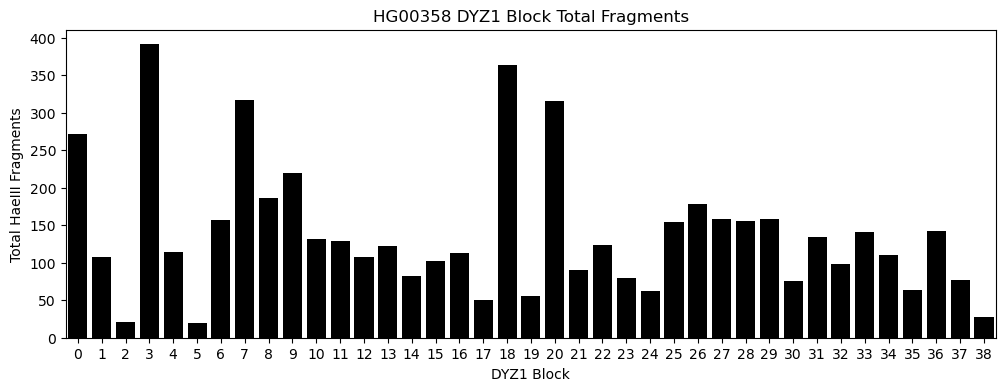

In [20]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 12,4
barplotList = []
for key in SpacerBlocks.keys():
    if int(key) < 39:
        barplotList.append([key, len(desired_df[desired_df['SpacerBlock']==int(key)])])
barplotDF = pd.DataFrame(data=barplotList, columns=['SpacerBlock','Total Fragments'])
sns.barplot(data=barplotDF, x='SpacerBlock', y='Total Fragments', color='black')
plt.title("HG00358 DYZ1 Block Total Fragments")
plt.xlabel("DYZ1 Block")
plt.ylabel("Total HaeIII Fragments")
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/DYZ1/HaeIII_Fragments/HG00358_HaeIII_TotalFragments.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [19]:
print("Mean: "+str(np.mean(desired_df[desired_df['SpacerBlock']<39]['Length'])))
print("Median: "+str(np.median(desired_df[desired_df['SpacerBlock']<39]['Length'])))

Mean: 3609.985383903793
Median: 3554.0


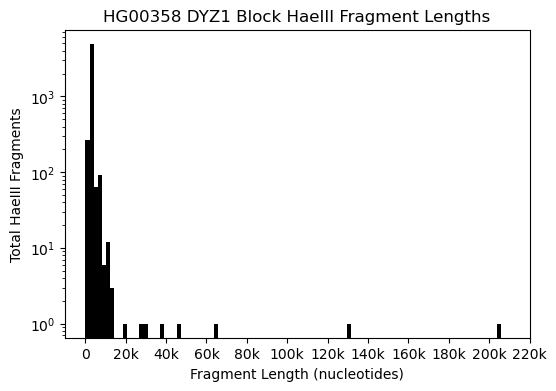

In [22]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 6,4
plt.hist(desired_df[desired_df['SpacerBlock']<39]['Length'], log=True, bins=100, color='black')
plt.title("HG00358 DYZ1 Block HaeIII Fragment Lengths")
plt.xlabel("Fragment Length (nucleotides)")
plt.ylabel("Total HaeIII Fragments")
x = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000, 220000]
labels = ['0', '20k', '40k', '60k', '80k', '100k', '120k', '140k', '160k', '180k', '200k', '220k']
  
plt.xticks(x, labels, rotation ='horizontal')

#plt.savefig("/home/mark/Desktop/chromosome_y/Images/DYZ1/HaeIII_Fragments/HG00358_HaeIII_Fragments.pdf", dpi=300, bbox_inches='tight')
plt.show()

## Import Repeatmasker and Visualize

In [21]:
desired_df['Coordinates']='temp'
for row in desired_df.index:
    desired_df.at[row,'Coordinates']='HG00358:'+str(desired_df.at[row,'Start'])+"-"+str(desired_df.at[row,'End'])

In [22]:
desired_df2 = desired_df.set_index("Coordinates").copy()
desired_df2

,SpacerBlock,Length,Start,End
Coordinates,,,,
HG00358:26322871-26528700,0,205830,26322871,26528700
HG00358:26528701-26529818,0,1118,26528701,26529818
HG00358:26529819-26531841,0,2023,26529819,26531841
HG00358:26531842-26532950,0,1109,26531842,26532950
HG00358:26532951-26534972,0,2022,26532951,26534972
...,...,...,...,...
HG00358:58433169-58436669,38,3501,58433169,58436669
HG00358:58436670-58440168,38,3499,58436670,58440168
HG00358:58440169-58443712,38,3544,58440169,58443712


In [23]:
sampleDict = {x:'+' for x in desired_df2.index}

In [24]:
spaceBlockDict = {x:{} for x in spacerDictionary.values()}
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG00358/HG00358_digestion_cleaned.fasta.out') as f:
    Lines = f.readlines()
    
    for line in tqdm(Lines):
        
        goodLine = ' '.join(line.split())
        if 'HSATII' in goodLine:
            #print(goodLine)
            sampleDict[str(goodLine.split(" ")[4])]=str(goodLine.split(" ")[8])
        else:
            continue
        
    f.close()

100%|█████████████████████████████████| 57534/57534 [00:00<00:00, 461466.40it/s]


In [25]:
sampleDict

{'HG00358:26322871-26528700': 'C',
 'HG00358:26528701-26529818': 'C',
 'HG00358:26529819-26531841': 'C',
 'HG00358:26531842-26532950': 'C',
 'HG00358:26532951-26534972': 'C',
 'HG00358:26534973-26537671': 'C',
 'HG00358:26537672-26540782': 'C',
 'HG00358:26540783-26541896': 'C',
 'HG00358:26541897-26543913': 'C',
 'HG00358:26543914-26546612': 'C',
 'HG00358:26546613-26549723': 'C',
 'HG00358:26549724-26550837': 'C',
 'HG00358:26550838-26552854': 'C',
 'HG00358:26552855-26555975': 'C',
 'HG00358:26555976-26557089': 'C',
 'HG00358:26557090-26559106': 'C',
 'HG00358:26559107-26563335': 'C',
 'HG00358:26563336-26566442': 'C',
 'HG00358:26566443-26568439': 'C',
 'HG00358:26568440-26606860': 'C',
 'HG00358:26606861-26633831': 'C',
 'HG00358:26633832-26764073': 'C',
 'HG00358:26764074-26776471': 'C',
 'HG00358:26776472-26796472': 'C',
 'HG00358:26796473-26800000': 'C',
 'HG00358:26800001-26803544': 'C',
 'HG00358:26803545-26807113': 'C',
 'HG00358:26807114-26810642': 'C',
 'HG00358:26810643-2

In [26]:
desired_df2['Orientation']=[x for x in sampleDict.values()]
desired_df2

,SpacerBlock,Length,Start,End,Orientation
Coordinates,,,,,
HG00358:26322871-26528700,0,205830,26322871,26528700,C
HG00358:26528701-26529818,0,1118,26528701,26529818,C
HG00358:26529819-26531841,0,2023,26529819,26531841,C
HG00358:26531842-26532950,0,1109,26531842,26532950,C
HG00358:26532951-26534972,0,2022,26532951,26534972,C
...,...,...,...,...,...
HG00358:58433169-58436669,38,3501,58433169,58436669,C
HG00358:58436670-58440168,38,3499,58436670,58440168,C
HG00358:58440169-58443712,38,3544,58440169,58443712,C


In [27]:
#desired_df2 = desired_df[desired_df['SpacerBlock']<23].copy()
#desired_df2['Orientation']='temp'
desired_df2['Color']='black'

In [28]:
for row in desired_df2.index:
    if desired_df2.at[row,'Orientation'] == '+':
        desired_df2.at[row,'Color']='blue'
    elif desired_df2.at[row,'Orientation'] == 'C':
        desired_df2.at[row,'Color']='red'
    else:
        continue

In [29]:
desired_df2

,SpacerBlock,Length,Start,End,Orientation,Color
Coordinates,,,,,,
HG00358:26322871-26528700,0,205830,26322871,26528700,C,red
HG00358:26528701-26529818,0,1118,26528701,26529818,C,red
HG00358:26529819-26531841,0,2023,26529819,26531841,C,red
HG00358:26531842-26532950,0,1109,26531842,26532950,C,red
HG00358:26532951-26534972,0,2022,26532951,26534972,C,red
...,...,...,...,...,...,...
HG00358:58433169-58436669,38,3501,58433169,58436669,C,red
HG00358:58436670-58440168,38,3499,58436670,58440168,C,red
HG00358:58440169-58443712,38,3544,58440169,58443712,C,red


In [30]:
print(collections.Counter(desired_df2['Orientation']))
print(collections.Counter(desired_df2['Color']))

Counter({'C': 5154, '+': 251})
Counter({'red': 5154, 'blue': 251})


In [31]:
#####################################################################################

In [32]:
rb_df = desired_df2.copy()

# Clusters

In [33]:
import pysam
from Bio.Seq import Seq

In [34]:
def split(word):
    return [char for char in word]

tempList = {}

#All Rows
for row in rb_df.index:
    
    
    tempDict = {}
    
    sequence = (pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HG00358.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:"+str(desired_df2.at[row,'Start'])+"-"+str(desired_df2.at[row,'End'])))

    if rb_df.at[row,'Color'] == 'blue':
        
        
        mySeq1 = sequence.split("HG00358:"+str(desired_df2.at[row,'Start'])+"-"+str(desired_df2.at[row,'End']))[1].strip()
        seq = Seq(mySeq1)
        mySeq = split(seq.reverse_complement())
        
    else:
        #print(split(sequence.split("chrY:"+str(desired_df2.at[row,'Start'])+"-"+str(desired_df2.at[row,'End']))))
        mySeq = (split(sequence.split("HG00358:"+str(desired_df2.at[row,'Start'])+"-"+str(desired_df2.at[row,'End']))[1].strip()))
    
    goodSeq = []
    for x in mySeq:
        if str(x) != '\n':
            goodSeq.append(str(x))
        else:
            continue

    
    i=0
    while i < len(goodSeq):
        
        if len(str(''.join(goodSeq[i:i+5])).strip()) > 4:
            if str(''.join(goodSeq[i:i+5])) in tempDict.keys():
                tempDict[str(''.join(goodSeq[i:i+5]))]+=1
            else:
                tempDict[str(''.join(goodSeq[i:i+5]))]=1

        i+=1
        
    tempList["HG00358:"+str(desired_df2.at[row,'Start'])+"-"+str(desired_df2.at[row,'End'])]=tempDict


In [35]:
allKeys = []
for key in tempList.keys():
    for kmer in tempList[key]:
        if kmer in allKeys:
            continue
        else:
            allKeys.append(kmer)
            
kmerDF = pd.DataFrame(index=[x for x in tempList.keys()], columns=[x for x in set(allKeys)]).fillna(0)
kmerDF

,GTGAG,CCAGA,TTCGT,CATCG,ACTTG,TCGGG,ATTCA,TGGAT,GTAGG,AGGAA,...,GTACG,GCACT,TCATC,TGTGG,TGCCA,AGTCG,CGCAG,AGAGG,TCTGC,AACGG
HG00358:26322871-26528700,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG00358:26528701-26529818,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG00358:26529819-26531841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG00358:26531842-26532950,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG00358:26532951-26534972,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HG00358:58433169-58436669,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG00358:58436670-58440168,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG00358:58440169-58443712,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG00358:58443713-58447245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
for key in tqdm(tempList.keys()):
    for kmer in tempList[key]:
        kmerDF.at[str(key),str(kmer)]= int(tempList[key][kmer])
kmerDF

100%|██████████████████████████████████████| 5405/5405 [00:12<00:00, 429.15it/s]


,GTGAG,CCAGA,TTCGT,CATCG,ACTTG,TCGGG,ATTCA,TGGAT,GTAGG,AGGAA,...,GTACG,GCACT,TCATC,TGTGG,TGCCA,AGTCG,CGCAG,AGAGG,TCTGC,AACGG
HG00358:26322871-26528700,151,0,1,85,9,1,131,1729,70,952,...,0,67,0,282,1,28,54,398,0,470
HG00358:26528701-26529818,1,0,0,1,0,0,1,6,0,2,...,0,1,0,4,0,0,0,1,0,2
HG00358:26529819-26531841,1,0,0,0,0,0,0,13,2,14,...,0,0,0,3,0,3,1,7,0,6
HG00358:26531842-26532950,1,0,0,1,0,0,1,5,0,2,...,0,1,0,3,0,0,0,1,0,2
HG00358:26532951-26534972,1,0,0,0,0,0,0,13,2,10,...,0,0,0,3,0,3,1,4,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HG00358:58433169-58436669,0,0,0,2,1,0,2,14,0,35,...,1,2,2,1,0,6,0,0,0,18
HG00358:58436670-58440168,0,0,0,2,1,0,1,10,0,36,...,2,1,2,0,0,5,0,0,0,17
HG00358:58440169-58443712,0,0,0,1,0,0,1,10,0,33,...,2,1,2,0,0,5,0,0,0,19
HG00358:58443713-58447245,0,0,0,2,1,0,4,10,1,36,...,1,0,2,0,0,5,0,0,0,14


In [37]:
def prevalenceFilter(df):
    dfo = df.copy()
    dfo2 = dfo.div(dfo.sum(axis=1), axis=0).copy()            
    return(dfo2)

In [38]:
import composition_stats as cs

In [39]:
def clrTransformation(df):
    #CLR Transform the relative abundnace dataframe
    df2 = df.copy()

    for row in df.index:
        df2.loc[row] = cs.clr(np.array(df.loc[row].replace(0.0, 1e-10)))
    
    return(df2)

In [40]:
abundanceKmer = prevalenceFilter(kmerDF)
abundanceKmer

,GTGAG,CCAGA,TTCGT,CATCG,ACTTG,TCGGG,ATTCA,TGGAT,GTAGG,AGGAA,...,GTACG,GCACT,TCATC,TGTGG,TGCCA,AGTCG,CGCAG,AGAGG,TCTGC,AACGG
HG00358:26322871-26528700,0.000734,0.0,0.000005,0.000413,0.000044,0.000005,0.000636,0.008400,0.000340,0.004625,...,0.000000,0.000326,0.000000,0.001370,0.000005,0.000136,0.000262,0.001934,0.0,0.002283
HG00358:26528701-26529818,0.000898,0.0,0.000000,0.000898,0.000000,0.000000,0.000898,0.005386,0.000000,0.001795,...,0.000000,0.000898,0.000000,0.003591,0.000000,0.000000,0.000000,0.000898,0.0,0.001795
HG00358:26529819-26531841,0.000495,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.006439,0.000991,0.006934,...,0.000000,0.000000,0.000000,0.001486,0.000000,0.001486,0.000495,0.003467,0.0,0.002972
HG00358:26531842-26532950,0.000905,0.0,0.000000,0.000905,0.000000,0.000000,0.000905,0.004525,0.000000,0.001810,...,0.000000,0.000905,0.000000,0.002715,0.000000,0.000000,0.000000,0.000905,0.0,0.001810
HG00358:26532951-26534972,0.000496,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.006442,0.000991,0.004955,...,0.000000,0.000000,0.000000,0.001487,0.000000,0.001487,0.000496,0.001982,0.0,0.001982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HG00358:58433169-58436669,0.000000,0.0,0.000000,0.000572,0.000286,0.000000,0.000572,0.004003,0.000000,0.010009,...,0.000286,0.000572,0.000572,0.000286,0.000000,0.001716,0.000000,0.000000,0.0,0.005147
HG00358:58436670-58440168,0.000000,0.0,0.000000,0.000572,0.000286,0.000000,0.000286,0.002861,0.000000,0.010300,...,0.000572,0.000286,0.000572,0.000000,0.000000,0.001431,0.000000,0.000000,0.0,0.004864
HG00358:58440169-58443712,0.000000,0.0,0.000000,0.000282,0.000000,0.000000,0.000282,0.002825,0.000000,0.009322,...,0.000565,0.000282,0.000565,0.000000,0.000000,0.001412,0.000000,0.000000,0.0,0.005367
HG00358:58443713-58447245,0.000000,0.0,0.000000,0.000567,0.000283,0.000000,0.001133,0.002834,0.000283,0.010201,...,0.000283,0.000000,0.000567,0.000000,0.000000,0.001417,0.000000,0.000000,0.0,0.003967


In [41]:
CLR_KMER = clrTransformation(abundanceKmer)

In [42]:
CLR_KMER.index.name ='SampleName'

In [43]:
for row in rb_df.index:
    if 'HG00358:'+str(rb_df.at[row,'Start'])+"-"+str(rb_df.at[row,'End']) in CLR_KMER.index:
        CLR_KMER.at['HG00358:'+str(rb_df.at[row,'Start'])+"-"+str(rb_df.at[row,'End']), 'Color'] = str(rb_df.at[row,'Color'])
CLR_KMER

,GTGAG,CCAGA,TTCGT,CATCG,ACTTG,TCGGG,ATTCA,TGGAT,GTAGG,AGGAA,...,GCACT,TCATC,TGTGG,TGCCA,AGTCG,CGCAG,AGAGG,TCTGC,AACGG,Color
SampleName,,,,,,,,,,,,,,,,,,,,,
HG00358:26322871-26528700,6.057808,-9.750536,1.040528,5.483180,3.237753,1.040528,5.915726,8.495827,5.289024,7.899094,...,5.245221,-9.750536,6.682436,1.040528,4.372733,5.029513,7.026980,-9.750536,7.193261,red
HG00358:26528701-26529818,10.922115,-5.088024,-5.088024,10.922115,-5.088024,-5.088024,10.922115,12.713874,-5.088024,11.615262,...,10.922115,-5.088024,12.308409,-5.088024,-5.088024,-5.088024,10.922115,-5.088024,11.615262,red
HG00358:26529819-26531841,9.558256,-5.857237,-5.857237,-5.857237,-5.857237,-5.857237,-5.857237,12.123205,10.251403,12.197313,...,-5.857237,-5.857237,10.656868,-5.857237,10.656868,9.558256,11.504166,-5.857237,11.350016,red
HG00358:26531842-26532950,10.741991,-5.276260,-5.276260,10.741991,-5.276260,-5.276260,10.741991,12.351429,-5.276260,11.435138,...,10.741991,-5.276260,11.840603,-5.276260,-5.276260,-5.276260,10.741991,-5.276260,11.435138,red
HG00358:26532951-26534972,9.632945,-5.783044,-5.783044,-5.783044,-5.783044,-5.783044,-5.783044,12.197894,10.326092,11.935530,...,-5.783044,-5.783044,10.731557,-5.783044,10.731557,9.632945,11.019239,-5.783044,11.019239,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HG00358:58433169-58436669,-7.182161,-7.182161,-7.182161,8.377177,7.684030,-7.182161,8.377177,10.323087,-7.182161,11.239378,...,8.377177,8.377177,7.684030,-7.182161,9.475789,-7.182161,-7.182161,-7.182161,10.574401,red
HG00358:58436670-58440168,-7.176835,-7.176835,-7.176835,8.383075,7.689927,-7.176835,7.689927,9.992512,-7.176835,11.273446,...,7.689927,8.383075,-7.176835,-7.176835,9.299365,-7.176835,-7.176835,-7.176835,10.523141,red
HG00358:58440169-58443712,-7.319455,-7.319455,-7.319455,7.534514,-7.319455,-7.319455,7.534514,9.837099,-7.319455,11.031021,...,7.534514,8.227661,-7.319455,-7.319455,9.143951,-7.319455,-7.319455,-7.319455,10.478952,red


In [44]:
set(CLR_KMER['Color'])

{'blue', 'red'}

In [45]:
##################### Bray-Curtis distance ##################

In [46]:
from scipy.spatial import distance

In [47]:
fragmentList = [x for x in kmerDF.index]
fragmentList

['HG00358:26322871-26528700',
 'HG00358:26528701-26529818',
 'HG00358:26529819-26531841',
 'HG00358:26531842-26532950',
 'HG00358:26532951-26534972',
 'HG00358:26534973-26537671',
 'HG00358:26537672-26540782',
 'HG00358:26540783-26541896',
 'HG00358:26541897-26543913',
 'HG00358:26543914-26546612',
 'HG00358:26546613-26549723',
 'HG00358:26549724-26550837',
 'HG00358:26550838-26552854',
 'HG00358:26552855-26555975',
 'HG00358:26555976-26557089',
 'HG00358:26557090-26559106',
 'HG00358:26559107-26563335',
 'HG00358:26563336-26566442',
 'HG00358:26566443-26568439',
 'HG00358:26568440-26606860',
 'HG00358:26606861-26633831',
 'HG00358:26633832-26764073',
 'HG00358:26764074-26776471',
 'HG00358:26776472-26796472',
 'HG00358:26796473-26800000',
 'HG00358:26800001-26803544',
 'HG00358:26803545-26807113',
 'HG00358:26807114-26810642',
 'HG00358:26810643-26814216',
 'HG00358:26814217-26817745',
 'HG00358:26817746-26824893',
 'HG00358:26824894-26828422',
 'HG00358:26828423-26832000',
 'HG00358:

In [48]:
OrientationDict = {}
for row in rb_df.index:
    OrientationDict['HG00358:'+str(rb_df.at[row,'Start'])+'-'+str(rb_df.at[row,'End'])] = str(rb_df.at[row,'Orientation'])
OrientationDict

{'HG00358:26322871-26528700': 'C',
 'HG00358:26528701-26529818': 'C',
 'HG00358:26529819-26531841': 'C',
 'HG00358:26531842-26532950': 'C',
 'HG00358:26532951-26534972': 'C',
 'HG00358:26534973-26537671': 'C',
 'HG00358:26537672-26540782': 'C',
 'HG00358:26540783-26541896': 'C',
 'HG00358:26541897-26543913': 'C',
 'HG00358:26543914-26546612': 'C',
 'HG00358:26546613-26549723': 'C',
 'HG00358:26549724-26550837': 'C',
 'HG00358:26550838-26552854': 'C',
 'HG00358:26552855-26555975': 'C',
 'HG00358:26555976-26557089': 'C',
 'HG00358:26557090-26559106': 'C',
 'HG00358:26559107-26563335': 'C',
 'HG00358:26563336-26566442': 'C',
 'HG00358:26566443-26568439': 'C',
 'HG00358:26568440-26606860': 'C',
 'HG00358:26606861-26633831': 'C',
 'HG00358:26633832-26764073': 'C',
 'HG00358:26764074-26776471': 'C',
 'HG00358:26776472-26796472': 'C',
 'HG00358:26796473-26800000': 'C',
 'HG00358:26800001-26803544': 'C',
 'HG00358:26803545-26807113': 'C',
 'HG00358:26807114-26810642': 'C',
 'HG00358:26810643-2

In [49]:
#All Rows

def split(word):
    return [char for char in word]

tempList = {}

for (dirpath, dirnames, filenames) in walk("/home/mark/Desktop/chromosome_y/centReferences/references/"):
    for name in filenames:
        print(name)
        
        file1 = open('/home/mark/Desktop/chromosome_y/centReferences/references/'+name, 'r')
        Lines = file1.readlines()

        tempDict = {}


        for line in tqdm(Lines): 
            
            if '>' in line:
                continue
            else:
                
                if 'DYZ1_' in name:
                    
                    seq = Seq(line.strip())
                    mySeq = split(seq.reverse_complement())
                    
                    goodSeq = []
                    for x in mySeq:
                        if str(x) != 'n':
                            goodSeq.append(str(x))
                        else:
                            continue

                    i=0
                    while i < len(goodSeq):

                        if len(str(''.join(goodSeq[i:i+5])).strip()) > 4:
                            
                            if str(''.join(goodSeq[i:i+5])) in tempDict.keys():
                                tempDict[str(''.join(goodSeq[i:i+5]))]+=1
                            else:
                                tempDict[str(''.join(goodSeq[i:i+5]))]=1

                        i+=1
                        
                else:
                    
                    seq = Seq(line.strip())
                    mySeq = split(seq)
                    print(mySeq)
                    
                    goodSeq = []
                    for x in mySeq:
                        if str(x) != 'n':
                            goodSeq.append(str(x))
                        else:
                            continue
                            
                    i=0
                    while i < len(goodSeq):

                        if len(str(''.join(goodSeq[i:i+5])).strip()) > 4:
                            if str(''.join(goodSeq[i:i+5])) in tempDict.keys():
                                tempDict[str(''.join(goodSeq[i:i+5]))]+=1
                            else:
                                tempDict[str(''.join(goodSeq[i:i+5]))]=1

                        i+=1
                        

       
        tempList[name.split(".")[0]]=tempDict
        
    
            
ConkmerDF = pd.DataFrame(index=[x for x in tempList.keys()], columns=abundanceKmer.columns).fillna(0)
for key in tempList.keys():
    for kmer in tempList[key]:
        if kmer in ConkmerDF.columns:
            ConkmerDF.at[str(key),str(kmer)]= int(tempList[key][kmer])
        else:
            continue
        
ConkmerDF.fillna(0, inplace=True)
abundanceConsensus = prevalenceFilter(ConkmerDF)
abundanceConsensus

Yqhet_3k1bp.fasta


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 339.72it/s]


['G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'C', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'A', 'G', 'G', 'C', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'A', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'G', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'T', 'G', 'G', 'T', 'G', 'G', 'A', 'G', 'A', 'A', 'T', 'A', 'T', 'T', 'G', 'G', 'A', 'A', 'A', 'A', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'T', 'G', 'A', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'A', 'G', 'T', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T',

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 498.85it/s]


['T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'C', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'A', 'G', 'G', 'G', 'G', 'T', 'G', 'A', 'A', 'T', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'T', 'G', 'C', 'T', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'A', 'C', 'T', 'G', 'C', 'A', 'T', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'A', 'G', 'A', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'C', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'T', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G',

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 411.77it/s]


Yqhet_2k7bp.fasta


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 406.15it/s]


['G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'C', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'A', 'G', 'G', 'C', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'A', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'G', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'A', 'G', 'T', 'A', 'T', 'T', 'G', 'G', 'A', 'A', 'A', 'A', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'C', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'T', 'G', 'A', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'A', 'G', 'T', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T',

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 331.38it/s]


['G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'C', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'A', 'G', 'G', 'C', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'A', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'G', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'T', 'G', 'G', 'T', 'G', 'G', 'A', 'G', 'A', 'A', 'T', 'A', 'T', 'T', 'G', 'G', 'A', 'A', 'A', 'A', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'T', 'G', 'A', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'A', 'G', 'T', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T',

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 393.00it/s]


['T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'C', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'A', 'G', 'G', 'G', 'G', 'T', 'G', 'A', 'A', 'T', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'T', 'G', 'C', 'T', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'A', 'C', 'T', 'G', 'C', 'A', 'T', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'A', 'G', 'A', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'C', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'T', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G',

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 344.97it/s]


Yqhet_2k7bp.fasta


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 497.78it/s]


['G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'C', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'A', 'G', 'G', 'C', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'A', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'G', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'A', 'G', 'T', 'A', 'T', 'T', 'G', 'G', 'A', 'A', 'A', 'A', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'C', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'T', 'G', 'A', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'A', 'G', 'T', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T',

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 414.97it/s]


,GTGAG,CCAGA,TTCGT,CATCG,ACTTG,TCGGG,ATTCA,TGGAT,GTAGG,AGGAA,...,GTACG,GCACT,TCATC,TGTGG,TGCCA,AGTCG,CGCAG,AGAGG,TCTGC,AACGG
Yqhet_3k1bp,0.000642,0.0,0.0,0.000321,0.000000,0.0,0.000321,0.006421,0.000642,0.004173,...,0.000000,0.000321,0.000000,0.002247,0.000000,0.000963,0.00000,0.002247,0.0,0.002568
DYZ18_Yq,0.001049,0.0,0.0,0.000350,0.000000,0.0,0.000350,0.008392,0.000350,0.004196,...,0.000000,0.000350,0.000000,0.001399,0.000000,0.000000,0.00035,0.002448,0.0,0.001399
DYZ1_Yq,0.000000,0.0,0.0,0.000561,0.000000,0.0,0.000561,0.002805,0.000000,0.009257,...,0.000561,0.000561,0.000561,0.000000,0.000000,0.000842,0.00000,0.000000,0.0,0.003927
Yqhet_2k7bp,0.000362,0.0,0.0,0.000362,0.000362,0.0,0.000000,0.003261,0.000362,0.005797,...,0.000362,0.000000,0.000362,0.000000,0.000362,0.001087,0.00000,0.000725,0.0,0.003261


In [50]:
ConkmerDF

,GTGAG,CCAGA,TTCGT,CATCG,ACTTG,TCGGG,ATTCA,TGGAT,GTAGG,AGGAA,...,GTACG,GCACT,TCATC,TGTGG,TGCCA,AGTCG,CGCAG,AGAGG,TCTGC,AACGG
Yqhet_3k1bp,2,0,0,1,0,0,1,20,2,13,...,0,1,0,7,0,3,0,7,0,8
DYZ18_Yq,3,0,0,1,0,0,1,24,1,12,...,0,1,0,4,0,0,1,7,0,4
DYZ1_Yq,0,0,0,2,0,0,2,10,0,33,...,2,2,2,0,0,3,0,0,0,14
Yqhet_2k7bp,1,0,0,1,1,0,0,9,1,16,...,1,0,1,0,1,3,0,2,0,9


In [51]:
for column in abundanceConsensus.columns:
    if column in abundanceKmer.columns:
        continue
    else:
        print(column)

In [52]:
for con in tempList.keys():
    print(con)
    print(tempList[con].values())

Yqhet_3k1bp
dict_values([113, 118, 113, 123, 147, 142, 140, 147, 137, 10, 2, 1, 4, 3, 1, 4, 5, 5, 9, 21, 26, 27, 29, 18, 14, 12, 4, 1, 4, 3, 3, 111, 5, 1, 5, 7, 8, 8, 5, 5, 2, 4, 4, 9, 12, 20, 24, 18, 2, 1, 7, 6, 7, 5, 2, 13, 12, 2, 2, 2, 19, 18, 12, 8, 5, 6, 2, 11, 5, 11, 12, 9, 10, 10, 7, 7, 6, 4, 2, 2, 6, 10, 8, 7, 8, 9, 9, 5, 1, 1, 2, 2, 11, 10, 12, 11, 10, 2, 3, 4, 1, 1, 3, 3, 4, 3, 1, 12, 10, 1, 3, 1, 1, 1, 1, 5, 1, 1, 1, 1, 2, 2, 1, 10, 9, 8, 7, 4, 2, 3, 4, 2, 2, 26, 7, 6, 3, 3, 5, 40, 19, 18, 20, 18, 11, 28, 25, 29, 21, 37, 1, 1, 1, 1, 1, 2, 3, 3, 2, 2, 3, 13, 7, 5, 18, 20, 22, 8, 2, 2, 3, 1, 1, 2, 1, 1, 7, 2, 1, 3, 4, 3, 3, 1, 1, 1, 1, 2, 2, 7, 7, 4, 1, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 8, 1, 5, 5, 12, 5, 5, 8, 5, 3, 3, 3, 2, 2, 1, 1, 1, 7, 9, 3, 3, 6, 2, 3, 1, 1, 6, 4, 2, 2, 2, 2, 3, 2, 2, 5, 4, 1, 2, 4, 3, 3, 2, 5, 1, 1, 3, 1, 4, 4, 2, 2, 1, 2, 4, 10, 1, 1, 1, 4, 4, 3, 9, 2, 1, 1, 1, 2, 3, 2, 2, 4, 4, 4, 3, 1, 1, 1, 4, 3, 3, 3, 4, 2, 1, 5, 1, 3, 1, 1, 5, 3, 1, 4, 5, 2, 1, 

In [53]:
ConkmerDF[[x for x in ConkmerDF.max().sort_values(ascending=False).index]]

,AATGG,ATGGA,GAATG,GGAAT,TGGAA,GTGGA,GAGTG,AGTGG,GGAGT,TGGAG,...,GTGAT,CTAAG,AGATC,ATACC,GCGGG,CCATT,AGCCT,CCCAC,CATAC,CTCGG
Yqhet_3k1bp,147,137,140,142,147,123,118,113,113,111,...,0,0,0,0,0,0,0,0,0,0
DYZ18_Yq,133,126,126,131,136,114,112,105,109,106,...,0,0,0,0,0,0,0,0,0,0
DYZ1_Yq,252,248,247,244,237,8,13,8,14,14,...,0,0,0,0,0,0,0,0,0,0
Yqhet_2k7bp,183,180,179,173,176,30,31,27,29,33,...,0,0,0,0,0,0,0,0,0,0


In [54]:
abundanceConsensus

,GTGAG,CCAGA,TTCGT,CATCG,ACTTG,TCGGG,ATTCA,TGGAT,GTAGG,AGGAA,...,GTACG,GCACT,TCATC,TGTGG,TGCCA,AGTCG,CGCAG,AGAGG,TCTGC,AACGG
Yqhet_3k1bp,0.000642,0.0,0.0,0.000321,0.000000,0.0,0.000321,0.006421,0.000642,0.004173,...,0.000000,0.000321,0.000000,0.002247,0.000000,0.000963,0.00000,0.002247,0.0,0.002568
DYZ18_Yq,0.001049,0.0,0.0,0.000350,0.000000,0.0,0.000350,0.008392,0.000350,0.004196,...,0.000000,0.000350,0.000000,0.001399,0.000000,0.000000,0.00035,0.002448,0.0,0.001399
DYZ1_Yq,0.000000,0.0,0.0,0.000561,0.000000,0.0,0.000561,0.002805,0.000000,0.009257,...,0.000561,0.000561,0.000561,0.000000,0.000000,0.000842,0.00000,0.000000,0.0,0.003927
Yqhet_2k7bp,0.000362,0.0,0.0,0.000362,0.000362,0.0,0.000000,0.003261,0.000362,0.005797,...,0.000362,0.000000,0.000362,0.000000,0.000362,0.001087,0.00000,0.000725,0.0,0.003261


In [55]:
#Compare to Consensus Sequence Code
fragmentList = [x for x in kmerDF.index]
myDict = {}
for x in fragmentList:
    myDict[x] = {}
    for y in abundanceConsensus.index:
        myDict[x][y] = 1-float(distance.braycurtis(list(abundanceKmer.loc[x]), list(abundanceConsensus.loc[y])))
    

In [56]:
print(len(kmerDF))

5405


In [57]:
myDict
myGoodDict = myDict.copy()

In [58]:
myGoodDict

{'HG00358:26322871-26528700': {'Yqhet_3k1bp': 0.9067409756677237,
  'DYZ18_Yq': 0.9469681601521116,
  'DYZ1_Yq': 0.6104832457715718,
  'Yqhet_2k7bp': 0.6729424086505036},
 'HG00358:26528701-26529818': {'Yqhet_3k1bp': 0.8122733861462605,
  'DYZ18_Yq': 0.799131837641712,
  'DYZ1_Yq': 0.5163146086654362,
  'Yqhet_2k7bp': 0.5673626831108682},
 'HG00358:26529819-26531841': {'Yqhet_3k1bp': 0.8820419497915867,
  'DYZ18_Yq': 0.8474592767311935,
  'DYZ1_Yq': 0.6429394802670563,
  'Yqhet_2k7bp': 0.7008280035316665},
 'HG00358:26531842-26532950': {'Yqhet_3k1bp': 0.8165379894395096,
  'DYZ18_Yq': 0.799876593994241,
  'DYZ1_Yq': 0.5195103221998694,
  'Yqhet_2k7bp': 0.573260541674864},
 'HG00358:26532951-26534972': {'Yqhet_3k1bp': 0.8871604993262882,
  'DYZ18_Yq': 0.8540821418423004,
  'DYZ1_Yq': 0.6425817015722453,
  'Yqhet_2k7bp': 0.7010061619338992},
 'HG00358:26534973-26537671': {'Yqhet_3k1bp': 0.9498321902816285,
  'DYZ18_Yq': 0.8969459112316255,
  'DYZ1_Yq': 0.6028779075062385,
  'Yqhet_2k7bp'

In [60]:
#import json
#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG00358/HG00358_kmerDict.json', 'w') as fp:
#    json.dump(myGoodDict, fp)

In [61]:
#Compare Fragments to Fragments
CutoffDict = {'0.1':0, '0.15':0, '0.2':0, '0.25':0, '0.3':0, '0.35':0, '0.4':0, '0.45':0, '0.5':0, '0.55':0, '0.6':0,'0.65':0, '0.7':0, '0.75':0, '0.8':0, '0.85':0, '0.9':0, '0.95':0}

for i in CutoffDict.keys():
    
    myCons = {'Yqhet_3k1bp':[], 'DYZ18_Yq':[], 'DYZ1_Yq':[], 'Yqhet_2k7bp':[], 'Other':[]}

    for x in myDict.keys():

        currentLeader = float(i)
        currentName = 'Other'

        for consensus in myDict[x].keys():

            if float(myDict[x][consensus]) > currentLeader:
                currentLeader = float(myDict[x][consensus])
                currentName = consensus
            else:
                continue

        myCons[currentName].append(x)

    CutoffDict[str(i)] = len(myCons['Other'])
    

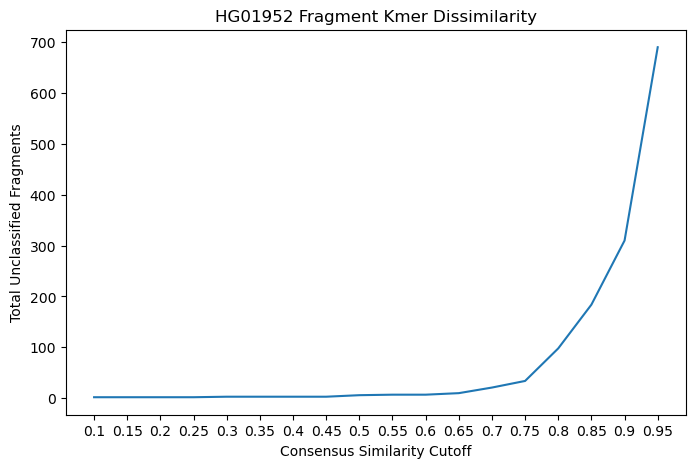

In [63]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 8,5
cutOffList = [[x,y] for x,y in CutoffDict.items()]
cutoffDF = pd.DataFrame(data=cutOffList, columns=['Similarity', 'Unknowns'])

sns.lineplot(data=cutoffDF, x='Similarity', y='Unknowns')

plt.title("HG01952 Fragment Kmer Dissimilarity")
plt.xlabel("Consensus Similarity Cutoff")
plt.ylabel("Total Unclassified Fragments")

#plt.savefig("/home/mark/Desktop/chromosome_y/Images/DYZ1/HaeIII_Fragments/HG00358_kmer_Fragments.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [64]:
#Compare Fragments to Fragments

myCons = {'Yqhet_3k1bp':[], 'DYZ18_Yq':[], 'DYZ1_Yq':[], 'Yqhet_2k7bp':[], 'Other':[]}

for x in myDict.keys():
    
    
    currentLeader = 0.75
    currentName = 'Other'
    
    for consensus in myDict[x].keys():
    
        if float(myDict[x][consensus]) > currentLeader:
            currentLeader = float(myDict[x][consensus])
            currentName = consensus
        else:
            continue
            
    myCons[currentName].append(x)


for cons in myCons.keys():
    
    fragmentList = [x for x in myCons[cons]]

    Run = 0
    while len(fragmentList) > 0:

        currentTarget = fragmentList.pop(0)

        myDict = {}
        for x in fragmentList:
            myDict[x]= 1-float(distance.braycurtis(list(abundanceKmer.loc[x]), list(abundanceKmer.loc[currentTarget])))

        tempList = []
        tempList.append(currentTarget)

        for x,y in myDict.items():
            if y > .75:
                tempList.append(x)
                fragmentList.remove(x)
            else:
                continue

        with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Kmeans/HG00358/myConBins/'+str(cons)+"_"+str(Run)+'.fasta', 'a+') as file:
            for row in tempList:
                if OrientationDict[row] == 'C':
                    file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HG00358.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:"+str(row.split("HG00358:")[1])))
                else:
                    file.write(str(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HG00358.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:"+str(row.split("HG00358:")[1]))).split("\n")[0]+'\n')
                    string = Seq(''.join(str(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HG00358.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:"+str(row.split("HG00358:")[1]))).split("\n")[1:]))
                    file.write(str(string.reverse_complement())+'\n')
        file.close()

        Run+=1
    

In [65]:
rb_df['Identity'] = 'temp'
for row in rb_df.index:
    rb_df.at[row,'Identity'] = 'HG00358:'+str(rb_df.at[row,'Start'])+"-"+str(rb_df.at[row,'End'])
rb_df.set_index("Identity", inplace=True)
rb_df

,SpacerBlock,Length,Start,End,Orientation,Color
Identity,,,,,,
HG00358:26322871-26528700,0,205830,26322871,26528700,C,red
HG00358:26528701-26529818,0,1118,26528701,26529818,C,red
HG00358:26529819-26531841,0,2023,26529819,26531841,C,red
HG00358:26531842-26532950,0,1109,26531842,26532950,C,red
HG00358:26532951-26534972,0,2022,26532951,26534972,C,red
...,...,...,...,...,...,...
HG00358:58433169-58436669,38,3501,58433169,58436669,C,red
HG00358:58436670-58440168,38,3499,58436670,58440168,C,red
HG00358:58440169-58443712,38,3544,58440169,58443712,C,red


In [66]:
rb_df['Color'] = 'temp'
for (dirpath, dirnames, filenames) in walk("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Kmeans/HG00358/myConBins/"):
    for name in filenames:
        print(name)
        
        file1 = open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Kmeans/HG00358/myConBins/'+name, 'r')
        Lines = file1.readlines()

        for line in tqdm(Lines): 
            if '>' in line:
                if 'Other' in name:
                    rb_df.at[str(line.split("utig4-2510.")[1].strip()), 'Color'] = 'lime'
                elif 'DYZ1_Yq' in name:
                    rb_df.at[str(line.split("utig4-2510.")[1].strip()), 'Color'] = 'black'
                    
                elif 'DYZ18_Yq' in name:
                    rb_df.at[str(line.split("utig4-2510.")[1].strip()), 'Color'] = 'grey'
                    
                elif 'Yqhet_2k7bp' in name:
                    rb_df.at[str(line.split("utig4-2510.")[1].strip()), 'Color'] = 'cyan'
                    
                elif 'Yqhet_3k1bp' in name:
                    rb_df.at[str(line.split("utig4-2510.")[1].strip()), 'Color'] = 'red'
                    
                else:
                    print("IDK")
    
            else:
                continue

Other_4.fasta


100%|███████████████████████████████████████████| 4/4 [00:00<00:00, 7884.03it/s]


Other_2.fasta


100%|█████████████████████████████████████| 203/203 [00:00<00:00, 594999.10it/s]


Other_0.fasta


100%|██████████████████████████████████████████| 2/2 [00:00<00:00, 34952.53it/s]


Other_9.fasta


100%|██████████████████████████████████████████| 4/4 [00:00<00:00, 81442.80it/s]


DYZ1_Yq_2.fasta


100%|███████████████████████████████████████| 11/11 [00:00<00:00, 172799.04it/s]


Other_1.fasta


100%|███████████████████████████████████████| 22/22 [00:00<00:00, 212125.72it/s]


Other_8.fasta


100%|████████████████████████████████████████| 11/11 [00:00<00:00, 86238.03it/s]


Other_3.fasta


100%|███████████████████████████████████████| 44/44 [00:00<00:00, 408295.08it/s]


Yqhet_3k1bp_0.fasta


100%|███████████████████████████████████| 1570/1570 [00:00<00:00, 650825.98it/s]


DYZ18_Yq_0.fasta


100%|███████████████████████████████████| 3432/3432 [00:00<00:00, 675148.98it/s]


Other_6.fasta


100%|██████████████████████████████████████████| 2/2 [00:00<00:00, 21024.08it/s]


Yqhet_2k7bp_0.fasta


100%|███████████████████████████████████| 2715/2715 [00:00<00:00, 667420.90it/s]


Yqhet_3k1bp_1.fasta


100%|█████████████████████████████████████| 210/210 [00:00<00:00, 519648.28it/s]


DYZ1_Yq_0.fasta


100%|██████████████████████████████| 308692/308692 [00:00<00:00, 1375745.08it/s]


Other_7.fasta


100%|██████████████████████████████████████████| 2/2 [00:00<00:00, 20971.52it/s]


DYZ1_Yq_1.fasta


100%|███████████████████████████████████████| 55/55 [00:00<00:00, 369098.75it/s]


Other_5.fasta


100%|█████████████████████████████████████| 108/108 [00:00<00:00, 354725.79it/s]


In [67]:
rb_df

,SpacerBlock,Length,Start,End,Orientation,Color
Identity,,,,,,
HG00358:26322871-26528700,0,205830,26322871,26528700,C,grey
HG00358:26528701-26529818,0,1118,26528701,26529818,C,red
HG00358:26529819-26531841,0,2023,26529819,26531841,C,red
HG00358:26531842-26532950,0,1109,26531842,26532950,C,red
HG00358:26532951-26534972,0,2022,26532951,26534972,C,red
...,...,...,...,...,...,...
HG00358:58433169-58436669,38,3501,58433169,58436669,C,black
HG00358:58436670-58440168,38,3499,58436670,58440168,C,black
HG00358:58440169-58443712,38,3544,58440169,58443712,C,black


In [68]:
for color in set(rb_df['Color']):
    with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG00358/Con_Seqs/'+str(color)+".fasta", 'a+') as file:
        for row in rb_df[rb_df['Color']==color].index:
            file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HG00358.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.utig4-2510."+str(row)))
    file.close()
        

In [69]:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG00358/Con_Seqs/black.fasta', 'r') as file:
    with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG00358/Con_Seqs/DYZ1.fasta', 'a+') as file2:
        Lines = file.readlines()
        for line in tqdm(Lines):
            if ">" in line:
                file2.write(">"+str(line.split("utig4-2510.")[1]))
            else:
                file2.write(line)
    file2.close()
file.close()

100%|██████████████████████████████| 325001/325001 [00:00<00:00, 1041244.06it/s]


In [70]:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG00358/Con_Seqs/grey.fasta', 'r') as file:
    with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG00358/Con_Seqs/DYZ18.fasta', 'a+') as file2:
        Lines = file.readlines()
        for line in tqdm(Lines):
            if ">" in line:
                file2.write(">"+str(line.split("utig4-2510.")[1]))
            else:
                file2.write(line)
    file2.close()
file.close()

100%|███████████████████████████████████| 3432/3432 [00:00<00:00, 504074.35it/s]


In [71]:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG00358/Con_Seqs/cyan.fasta', 'r') as file:
    with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG00358/Con_Seqs/2kbp.fasta', 'a+') as file2:
        Lines = file.readlines()
        for line in tqdm(Lines):
            if ">" in line:
                file2.write(">"+str(line.split("utig4-2510.")[1]))
            else:
                file2.write(line)
    file2.close()
file.close()

100%|███████████████████████████████████| 2715/2715 [00:00<00:00, 456762.08it/s]


In [72]:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG00358/Con_Seqs/red.fasta', 'r') as file:
    with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG00358/Con_Seqs/3kbp.fasta', 'a+') as file2:
        Lines = file.readlines()
        for line in tqdm(Lines):
            if ">" in line:
                file2.write(">"+str(line.split("utig4-2510.")[1]))
            else:
                file2.write(line)
    file2.close()
file.close()

100%|███████████████████████████████████| 1780/1780 [00:00<00:00, 170964.78it/s]


In [73]:
#rb_df.to_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG00358/DYZ1_dataframe.csv")

In [5]:
rb_df = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG00358/DYZ1_dataframe.csv").set_index("Identity")
rb_df

,SpacerBlock,Length,Start,End,Orientation,Color
Identity,,,,,,
HG00358:26322871-26528700,0,205830,26322871,26528700,C,grey
HG00358:26528701-26529818,0,1118,26528701,26529818,C,red
HG00358:26529819-26531841,0,2023,26529819,26531841,C,red
HG00358:26531842-26532950,0,1109,26531842,26532950,C,red
HG00358:26532951-26534972,0,2022,26532951,26534972,C,red
...,...,...,...,...,...,...
HG00358:58433169-58436669,38,3501,58433169,58436669,C,black
HG00358:58436670-58440168,38,3499,58436670,58440168,C,black
HG00358:58440169-58443712,38,3544,58440169,58443712,C,black


In [6]:
blockDefine = {x:{'Start':0, 'End':0} for x in set(rb_df['SpacerBlock'])}
for block in blockDefine.keys():
    blockDefine[block]['Start'] = int(rb_df[rb_df['SpacerBlock']==block].index[0].split("-")[0].split(":")[1])
    blockDefine[block]['End'] = int(rb_df[rb_df['SpacerBlock']==block].index[-1].split("-")[1])
blockDefine

{0: {'Start': 26322871, 'End': 27647271},
 1: {'Start': 27681006, 'End': 28134346},
 2: {'Start': 28193301, 'End': 28269110},
 3: {'Start': 28311848, 'End': 29667814},
 4: {'Start': 29827781, 'End': 30233067},
 5: {'Start': 30248933, 'End': 30319502},
 6: {'Start': 30425223, 'End': 30987114},
 7: {'Start': 31231793, 'End': 32331911},
 8: {'Start': 32598389, 'End': 33269771},
 9: {'Start': 33433585, 'End': 34221584},
 10: {'Start': 34589432, 'End': 35074600},
 11: {'Start': 35274611, 'End': 35736974},
 12: {'Start': 36560417, 'End': 36935805},
 13: {'Start': 37071716, 'End': 37492673},
 14: {'Start': 37725311, 'End': 38017448},
 15: {'Start': 38589569, 'End': 38938331},
 16: {'Start': 39009090, 'End': 39394595},
 17: {'Start': 39661005, 'End': 39839772},
 18: {'Start': 40786001, 'End': 42069305},
 19: {'Start': 42371989, 'End': 42568453},
 20: {'Start': 43536451, 'End': 44659418},
 21: {'Start': 45199376, 'End': 45526625},
 22: {'Start': 45878966, 'End': 46318273},
 23: {'Start': 465538

In [28]:
goodColors = ['cyan', 'red', 'grey']
for block in set(rb_df['SpacerBlock']):
    if str(block) == '0':
        
        for color in set(rb_df['Color']):
            if color in goodColors:
                with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG00358/Con_Seqs/Color_Blocks/'+str(color)+"_block.fasta", 'a+') as file:
                    Start= str(list(rb_df[(rb_df['SpacerBlock']==block) & (rb_df['Color']==color)].index)[0].split("-")[0].split(":")[1])
                    if color == 'red':
                        End = str(26694030)
                    else:
                        End =str(list(rb_df[(rb_df['SpacerBlock']==block) & (rb_df['Color']==color)].index)[-1].split("-")[1])
                    file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HG00358.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:"+Start+"-"+End))
                file.close()
                
            elif color == 'black':
                with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG00358/Con_Seqs/Color_Blocks/black_block.fasta', 'a+') as file:
                    Start= str(list(rb_df[(rb_df['SpacerBlock']==block) & (rb_df['Color']==color)].index)[0].split("-")[0].split(":")[1])
                    End =str(list(rb_df[(rb_df['SpacerBlock']==block)].index)[-1].split("-")[1])
                    file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HG00358.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:"+Start+"-"+End))
                file.close()
                
            else:
                continue
    else:
        with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG00358/Con_Seqs/Color_Blocks/black_block.fasta', 'a+') as file:
            Start= str(list(rb_df[(rb_df['SpacerBlock']==block)].index)[0].split("-")[0].split(":")[1])
            End =str(list(rb_df[(rb_df['SpacerBlock']==block)].index)[-1].split("-")[1])
            file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HG00358.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:"+Start+"-"+End))
        file.close()

In [29]:
for (dirpath, dirnames, filenames) in walk("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG00358/Con_Seqs/Color_Blocks/"):
    for name in filenames:
        print(name)
        
        if 'HMMER' in name or 'cleaned' in name:
            continue
        else:
        
            file1 = open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG00358/Con_Seqs/Color_Blocks/'+name, 'r')
            Lines = file1.readlines()

            with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG00358/Con_Seqs/Color_Blocks/'+name.split(".")[0]+'_cleaned.fasta', 'a+') as file2:
                for line in tqdm(Lines):
                    if ">" in line:
                        print(line)
                        file2.write(">"+str(line.split("utig4-2510.")[1]))
                    else:
                        file2.write(line)
            file2.close()


            file1.close()


red_block.fasta


100%|███████████████████████████████████| 2757/2757 [00:00<00:00, 456305.58it/s]


>chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:26528701-26694030

grey_block.fasta


100%|███████████████████████████████████| 3432/3432 [00:00<00:00, 516222.03it/s]


>chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:26322871-26528700

black_block.fasta


 18%|█████▋                          | 56327/317364 [00:00<00:00, 563227.57it/s]

>chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:26796473-27647271

>chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:27681006-28134346

>chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:28193301-28269110

>chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:28311848-29667814

>chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:29827781-30233067

>chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:30248933-30319502

>chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:30425223-30987114

>chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:31231793-32331911

>chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:32598389-33269771

>chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:33433585-34221584

>chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:34589432-35074600

>chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:35274611-35736974

>chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:36560417-36935805

>chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:37071716-37492673

>chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:37725311-38017448



 51%|███████████████▋               | 160576/317364 [00:00<00:00, 845093.34it/s]

>chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:38589569-38938331

>chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:39009090-39394595

>chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:39661005-39839772

>chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:40786001-42069305



100%|██████████████████████████████| 317364/317364 [00:00<00:00, 1013530.35it/s]


>chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:42371989-42568453

>chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:43536451-44659418

>chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:45199376-45526625

>chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:45878966-46318273

>chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:46553812-46845297

>chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:47319945-47540341

>chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:47834693-48380946

>chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:48819498-49438525

>chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:49925965-50474735

>chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:50956380-51498053

>chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:51975774-52511283

>chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:53006150-53262206

>chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:53508529-53981416

>chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:54276934-54608125

>chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:55153955-55603344

>chrY.01-2

100%|███████████████████████████████████| 2712/2712 [00:00<00:00, 603509.79it/s]

>chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:26633832-26796472

red_block_cleaned.fasta
black_block_cleaned.fasta
runHMMER2.sh
DYZ18_hmmer.tsv


FileNotFoundError: [Errno 2] No such file or directory: '/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG00358/Con_Seqs/Color_Blocks/DYZ18_hmmer.tsv'

In [12]:
sizeDict = {'DYZ1_Yq': 3569, 'DYZ18_Yq': 2864, 'Yqhet_3k1bp':3120, 'Yqhet_2k7bp': 2767}

In [7]:
DYZ18Dict = {x:[] for x in set(rb_df[rb_df['Color']=='grey'].index)}
DYZ1Dict = {x:[] for x in set(rb_df[rb_df['Color']=='black'].index)}
k3bpDict = {x:[] for x in set(rb_df[rb_df['Color']=='red'].index)}
k2bpDict = {x:[] for x in set(rb_df[rb_df['Color']=='cyan'].index)}

In [8]:
DYZ18_tempList = []

#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG00358/Con_Seqs/HMMER/DYZ18_hmmer.tsv', 'r') as file:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG00358/Con_Seqs/Color_Blocks/HMMER/DYZ18_hmmer.tsv', 'r') as file:

    Lines = file.readlines()
    
    for line in Lines:
        if '#' in line:
            continue
        else:
            fields = line.split(maxsplit=3)
            name = fields[0]
            info = fields[3].split()   
            
            if info[8] == '-':
                DYZ18_tempList.append([str(name),int(info[1]),int(info[2]), int(info[4]), int(info[3]), '+', float(info[9]), float(info[10]), int(int(info[3])-int(info[4]))])
            else:
                DYZ18_tempList.append([str(name),int(info[1]),int(info[2]), int(info[3]), int(info[4]), 'C', float(info[9]), float(info[10]), int(int(info[4])-int(info[3]))])

file.close()

DYZ18_hmmer2 = pd.DataFrame(data=DYZ18_tempList, columns=['Fragment','qstart','qend','fstart','fend','orientation','evalue','score', 'Length'])
DYZ18_hmmer = DYZ18_hmmer2[DYZ18_hmmer2['evalue']== 0.0].sort_values(by='fstart', ascending=True).copy()
DYZ18_hmmer

,Fragment,qstart,qend,fstart,fend,orientation,evalue,score,Length
26,HG00358:26322871-26528700,4,2864,2,2852,C,0.0,2463.9,2850
43,HG00358:26322871-26528700,2,2864,2854,5696,C,0.0,2447.8,2842
67,HG00358:26322871-26528700,2,2864,5698,8544,C,0.0,2405.6,2846
57,HG00358:26322871-26528700,2,2864,8546,11397,C,0.0,2436.0,2851
0,HG00358:26322871-26528700,2,2864,11399,14261,C,0.0,2517.2,2862
...,...,...,...,...,...,...,...,...,...
18,HG00358:26322871-26528700,2,2864,192608,195479,C,0.0,2465.6,2871
31,HG00358:26322871-26528700,2,2864,195481,198352,C,0.0,2460.7,2871
15,HG00358:26322871-26528700,2,2864,198354,201235,C,0.0,2466.6,2881
22,HG00358:26322871-26528700,2,2864,201237,204123,C,0.0,2464.9,2886


In [9]:
DYZ1_tempList = []

#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG00358/Con_Seqs/HMMER/DYZ1_hmmer.tsv', 'r') as file:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG00358/Con_Seqs/Color_Blocks/HMMER/DYZ1_hmmer.tsv', 'r') as file:

    Lines = file.readlines()
    
    for line in Lines:
        if '#' in line:
            continue
        else:
            fields = line.split(maxsplit=3)
            name = fields[0]
            info = fields[3].split()   
            
            if info[8] == '-':
                DYZ1_tempList.append([str(name),int(info[1]),int(info[2]), int(info[4]), int(info[3]), 'C', float(info[9]), float(info[10]), int(int(info[3])-int(info[4]))])
            else:
                DYZ1_tempList.append([str(name),int(info[1]),int(info[2]), int(info[3]), int(info[4]), '+', float(info[9]), float(info[10]), int(int(info[4])-int(info[3]))])

file.close()

DYZ1_hmmer2 = pd.DataFrame(data=DYZ1_tempList, columns=['Fragment','qstart','qend','fstart','fend','orientation','evalue','score', 'Length'])
DYZ1_hmmer = DYZ1_hmmer2[DYZ1_hmmer2['evalue']== 0.0].sort_values(by='fstart', ascending=True).copy()
DYZ1_hmmer

,Fragment,qstart,qend,fstart,fend,orientation,evalue,score,Length
4345,HG00358:26796473-27647271,1,3569,1,3528,C,0.0,3056.0,3527
5186,HG00358:57360360-57892582,500,3569,2,3052,+,0.0,2693.7,3050
4498,HG00358:30248933-30319502,1,3482,3,3484,C,0.0,3041.8,3481
5019,HG00358:27681006-28134346,1,3567,159,3698,+,0.0,2894.9,3539
5355,HG00358:28311848-29667814,1,2114,894,2887,C,0.0,1627.0,1993
...,...,...,...,...,...,...,...,...,...
2625,HG00358:28311848-29667814,1,3569,1338765,1342313,C,0.0,3109.5,3548
1675,HG00358:28311848-29667814,1,3569,1342314,1345872,C,0.0,3123.3,3558
4511,HG00358:28311848-29667814,1,3569,1345873,1349376,C,0.0,3039.8,3503
3227,HG00358:28311848-29667814,1,3569,1349377,1352905,C,0.0,3096.5,3528


In [10]:
k3_tempList = []

#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG00358/Con_Seqs/HMMER/Yq_3kbp_hmmer_extra.tsv', 'r') as file:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG00358/Con_Seqs/Color_Blocks/HMMER/Yq_3kbp_hmmer.tsv', 'r') as file:

    Lines = file.readlines()
    
    for line in Lines:
        if '#' in line:
            continue
        else:
            fields = line.split(maxsplit=3)
            name = fields[0]
            info = fields[3].split()   
            
            if info[8] == '-':
                k3_tempList.append([str(name),int(info[1]),int(info[2]), int(info[4]), int(info[3]), '+', float(info[9]), float(info[10]), int(int(info[3])-int(info[4]))])
            else:
                k3_tempList.append([str(name),int(info[1]),int(info[2]), int(info[3]), int(info[4]), 'C', float(info[9]), float(info[10]), int(int(info[4])-int(info[3]))])

file.close()

k3_hmmer2 = pd.DataFrame(data=k3_tempList, columns=['Fragment','qstart','qend','fstart','fend','orientation','evalue','score', 'Length'])
k3_hmmer = k3_hmmer2[k3_hmmer2['evalue']== 0.0].sort_values(by='fstart', ascending=True).copy()
k3_hmmer

,Fragment,qstart,qend,fstart,fend,orientation,evalue,score,Length
36,HG00358:26528701-26694030,603,3119,1728,4228,C,0.0,2225.9,2500
3,HG00358:26528701-26694030,2,3119,4228,7364,C,0.0,2771.4,3136
45,HG00358:26528701-26694030,1229,3119,8174,10063,C,0.0,1689.4,1889
7,HG00358:26528701-26694030,2,3119,10063,13174,C,0.0,2757.2,3111
0,HG00358:26528701-26694030,2,3119,13174,16305,C,0.0,2778.9,3131
44,HG00358:26528701-26694030,1229,3119,17115,19004,C,0.0,1690.0,1889
6,HG00358:26528701-26694030,2,3119,19004,22115,C,0.0,2760.3,3111
1,HG00358:26528701-26694030,2,3119,22115,25246,C,0.0,2775.7,3131
5,HG00358:26528701-26694030,2,3119,25246,28367,C,0.0,2760.5,3121
2,HG00358:26528701-26694030,2,3119,28367,31498,C,0.0,2773.2,3131


In [11]:
k2_tempList = []

#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG00358/Con_Seqs/HMMER/Yq_2k7bp_hmmer.tsv', 'r') as file:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG00358/Con_Seqs/Color_Blocks/HMMER/Yq_2k7bp_hmmer.tsv', 'r') as file:

    Lines = file.readlines()
    
    for line in Lines:
        if '#' in line:
            continue
        else:
            fields = line.split(maxsplit=3)
            name = fields[0]
            info = fields[3].split()   
            
            #Normally antisense
            if info[8] == '-':
                k2_tempList.append([str(name),int(info[1]),int(info[2]), int(info[4]), int(info[3]), '+', float(info[9]), float(info[10]), int(int(info[3])-int(info[4]))])
            else:
                k2_tempList.append([str(name),int(info[1]),int(info[2]), int(info[3]), int(info[4]), 'C', float(info[9]), float(info[10]), int(int(info[4])-int(info[3]))])

file.close()

k2_hmmer2 = pd.DataFrame(data=k2_tempList, columns=['Fragment','qstart','qend','fstart','fend','orientation','evalue','score', 'Length'])
k2_hmmer = k2_hmmer2[k2_hmmer2['evalue']== 0.0].sort_values(by='fstart', ascending=True).copy()
k2_hmmer

,Fragment,qstart,qend,fstart,fend,orientation,evalue,score,Length
37,HG00358:26633832-26796472,2,1312,60198,61498,C,0.0,1035.7,1300
36,HG00358:26633832-26796472,1271,2766,61487,62987,C,0.0,1317.1,1500
15,HG00358:26633832-26796472,2,2766,62987,65746,C,0.0,2487.0,2759
17,HG00358:26633832-26796472,2,2766,65746,68500,C,0.0,2480.4,2754
16,HG00358:26633832-26796472,2,2766,68500,71269,C,0.0,2482.4,2769
0,HG00358:26633832-26796472,2,2766,71269,74033,C,0.0,2517.4,2764
22,HG00358:26633832-26796472,2,2766,74033,76781,C,0.0,2463.7,2748
7,HG00358:26633832-26796472,2,2766,76781,79545,C,0.0,2500.5,2764
11,HG00358:26633832-26796472,2,2766,79545,82309,C,0.0,2498.7,2764
23,HG00358:26633832-26796472,2,2766,82309,85057,C,0.0,2462.1,2748


In [12]:
DYZ18_hmmer['Start']=0
DYZ1_hmmer['Start']=0
k3_hmmer['Start']=0
k2_hmmer['Start']=0

DYZ18_hmmer['End']=0
DYZ1_hmmer['End']=0
k3_hmmer['End']=0
k2_hmmer['End']=0

DYZ18_hmmer['Color']='grey'
DYZ1_hmmer['Color']='black'
k3_hmmer['Color']='red'
k2_hmmer['Color']='cyan'

DYZ18_hmmer['SpacerBlock']=0
DYZ1_hmmer['SpacerBlock']=0
k3_hmmer['SpacerBlock']=0
k2_hmmer['SpacerBlock']=0

In [13]:
for row in DYZ18_hmmer.index:
    DYZ18_hmmer.at[row,'Start'] = int(DYZ18_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(DYZ18_hmmer.at[row,'fstart'])
    DYZ18_hmmer.at[row,'End'] = int(DYZ18_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(DYZ18_hmmer.at[row,'fend'])
for row in DYZ1_hmmer.index:
    DYZ1_hmmer.at[row,'Start'] = int(DYZ1_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(DYZ1_hmmer.at[row,'fstart'])
    DYZ1_hmmer.at[row,'End'] = int(DYZ1_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(DYZ1_hmmer.at[row,'fend'])
for row in k3_hmmer.index:
    k3_hmmer.at[row,'Start'] = int(k3_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(k3_hmmer.at[row,'fstart'])
    k3_hmmer.at[row,'End'] = int(k3_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(k3_hmmer.at[row,'fend'])
for row in k2_hmmer.index:
    k2_hmmer.at[row,'Start'] = int(k2_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(k2_hmmer.at[row,'fstart'])
    k2_hmmer.at[row,'End'] = int(k2_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(k2_hmmer.at[row,'fend'])

In [14]:
LimeDF = rb_df[rb_df['Color']=="lime"].reset_index().rename(columns={'Identity':'Fragment'}).copy()

In [15]:
concattd = [DYZ18_hmmer, k3_hmmer,k2_hmmer,DYZ1_hmmer ]
newDF = pd.concat(concattd).drop(columns=['qstart', 'qend','fstart','fend','evalue','score'])
newDF.rename(columns={'orientation':"Orientation"}, inplace=True)
finalList = [newDF, LimeDF]
finalDF2 = pd.concat(finalList)
finalDF = finalDF2[finalDF2['Color']!='lime'].copy()
finalDF.sort_values(by='Start', ascending=True, inplace=True)

In [16]:
finalDF.reset_index(inplace=True)

In [17]:
for row in finalDF.index:
    for block in blockDefine.keys():
        if int(finalDF.at[row,'Start']) >= int(blockDefine[block]['Start']) and int(finalDF.at[row,'End']) <= int(blockDefine[block]['End']):
            finalDF.at[row,'SpacerBlock']= block
        else:
            continue

In [9]:
#for row in finalDF.index:
#    if str(finalDF.at[row,'Fragment']).strip() in list(rb_df.index):
#        finalDF.at[row,'SpacerBlock'] = rb_df.at[str(finalDF.at[row,'Fragment']),'SpacerBlock']
#    else:
#        continue
#finalDF

In [25]:
finalDF[finalDF['SpacerBlock']==0].iloc[[105]]

,index,Fragment,Orientation,Length,Start,End,Color,SpacerBlock
105,31,HG00358:26528701-26633831,C,2025,26631807,26633832,red,0


In [26]:
finalDF[finalDF['SpacerBlock']==0].iloc[[106]]

,index,Fragment,Orientation,Length,Start,End,Color,SpacerBlock
106,37,HG00358:26633832-26796472,C,1300,26694030,26695330,cyan,0


In [43]:
lapList = []
overlaps = []
for spacerblock in set(finalDF['SpacerBlock']):
    tempDF = finalDF[finalDF['SpacerBlock']==spacerblock].copy()
    i=0
    while i < len(tempDF.index):
        try:
            lapList.append(int(tempDF.iloc[i+1]['Start'])-int(tempDF.iloc[i]['End']))
            if int(tempDF.iloc[i+1]['Start'])-int(tempDF.iloc[i]['End']) < 0 or int(tempDF.iloc[i+1]['Start'])-int(tempDF.iloc[i]['End']) > 40000:
                print(spacerblock)
                print(int(tempDF.iloc[i+1]['Start'])-int(tempDF.iloc[i]['End']))
                print(i)
                overlaps.append(int(tempDF.iloc[i+1]['Start'])-int(tempDF.iloc[i]['End']))
                print('\n')
            i+=1
        except:
            i+=1
            continue
#lapList

0
-11
123


0
-14
202


0
-9
203


0
-12
205


0
-15
206


0
-15
207


0
-25
402


1
-21
31


1
-17
32


1
-25
33


1
-13
34


1
-13
35


1
-15
36


1
-16
37


1
-15
38


1
-14
39


1
-13
40


1
-15
41


1
-28
42


1
-13
43


1
-13
44


1
-13
45


1
-13
46


1
-25
47


1
-11
82


1
-11
88


3
-31
13


3
-31
77


3
-26
179


3
-9
220


3
-7
239


3
-18
246


3
-18
366


3
-26
368


3
-25
374


4
-30
0


4
-13
3


4
-25
12


4
-6
110


6
-32
0


6
-19
97


6
-18
119


7
-28
0


7
-19
115


7
-19
283


8
-19
0


8
-25
148


8
-25
150


8
-25
153


8
-25
166


9
-29
0


10
-17
0


11
-18
0


11
-19
49


11
-25
81


12
-18
0


13
-17
0


14
-18
0


14
-26
1


14
-10
74


15
-26
0


16
-17
0


17
-18
0


17
-19
10


19
-18
0


19
-19
10


21
-17
0


22
-17
0


22
-17
47


22
-25
89


23
-17
0


24
-17
0


25
-30
0


25
-17
52


25
-26
59


25
-17
91


25
-25
107


26
-18
0


26
-18
4


26
-9
117


26
-20
134


27
-19
0


27
-26
14


27
-12
107


28
-27
0


28
-66
96


28
-12
121


29
-19
0



In [44]:
print(len(overlaps))

107


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  6.,  6.,
        23.,  1., 13., 24., 19.,  7.,  6.]),
 array([-66., -63., -60., -57., -54., -51., -48., -45., -42., -39., -36.,
        -33., -30., -27., -24., -21., -18., -15., -12.,  -9.,  -6.]),
 <BarContainer object of 20 artists>)

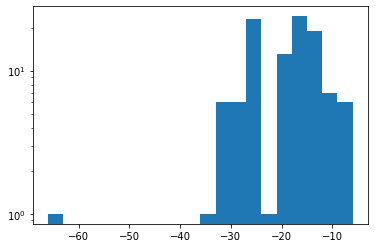

In [45]:
plt.hist(overlaps, log=True, bins=20)

3893
-66


(array([5.422e+03, 3.400e+01, 3.500e+01, 1.400e+01, 3.400e+01, 1.200e+01,
        4.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([ -66.  ,  131.95,  329.9 ,  527.85,  725.8 ,  923.75, 1121.7 ,
        1319.65, 1517.6 , 1715.55, 1913.5 , 2111.45, 2309.4 , 2507.35,
        2705.3 , 2903.25, 3101.2 , 3299.15, 3497.1 , 3695.05, 3893.  ]),
 <BarContainer object of 20 artists>)

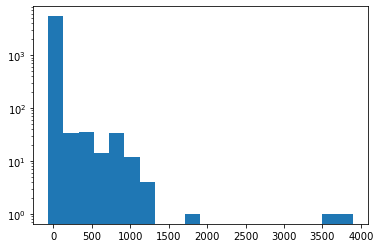

In [46]:
print(max(lapList))
print(min(lapList))

plt.hist(lapList, log=True, bins=20)

In [18]:
#rb_dfold = rb_df.copy()
rb_df = finalDF.copy()

In [117]:
rb_df[rb_df['Color']=='lime']

,index,Fragment,Orientation,Length,Start,End,Color,SpacerBlock
409,0,HG00358:27681006-27681165,+,160,27681006,27681165,lime,1
434,1,HG00358:27765272-27765666,+,395,27765272,27765666,lime,1
438,2,HG00358:27775917-27776311,+,395,27775917,27776311,lime,1
547,3,HG00358:28131463-28134346,+,2884,28131463,28134346,lime,1
548,4,HG00358:28193301-28195829,C,2529,28193301,28195829,lime,2
570,5,HG00358:28311848-28314734,C,2887,28311848,28314734,lime,3
579,6,HG00358:28341828-28341962,C,135,28341828,28341962,lime,3
693,7,HG00358:28722759-28723047,C,289,28722759,28723047,lime,3
1265,8,HG00358:30983773-30984061,C,289,30983773,30984061,lime,6
1459,9,HG00358:31905947-31906235,C,289,31905947,31906235,lime,7


# Export and update

In [118]:
rb_df[(rb_df['SpacerBlock']==0) & (rb_df['Color']=='black')]

,index,Fragment,Orientation,Length,Start,End,Color,SpacerBlock
159,4213,HG00358:26796473-26800000,C,3527,26796474,26800001,black,0
160,4306,HG00358:26800001-26803544,C,3543,26800002,26803545,black,0
161,3314,HG00358:26803545-26807113,C,3568,26803546,26807114,black,0
162,3879,HG00358:26807114-26810642,C,3528,26807115,26810643,black,0
163,3451,HG00358:26810643-26814216,C,3573,26810644,26814217,black,0
...,...,...,...,...,...,...,...,...
404,4280,HG00358:27629307-27632840,C,3533,27629308,27632841,black,0
405,3745,HG00358:27632841-27636384,C,3543,27632842,27636385,black,0
406,4689,HG00358:27636385-27639898,C,3513,27636386,27639899,black,0
407,4916,HG00358:27640844-27644977,C,3240,27641738,27644978,black,0


In [130]:
tempDF.at[0,'Start']=26796474
tempDF.at[0,'Length']= (27647270-26796474)
tempDF

,Block_Number,Block_Type,Length,Start,End,SampleName
0,0,Spacer Block,850796,26796474,27647270,HG00358
1,0,Repeat Block,33734,27647271,27681004,HG00358
2,1,Spacer Block,453341,27681005,28134345,HG00358
3,1,Repeat Block,58954,28134346,28193299,HG00358
4,2,Spacer Block,75810,28193300,28269109,HG00358
...,...,...,...,...,...,...
73,36,Repeat Block,80976,57892582,57973557,HG00358
74,37,Spacer Block,260504,57973558,58234061,HG00358
75,37,Repeat Block,13737,58234062,58247798,HG00358
76,38,Spacer Block,199597,58247799,58447395,HG00358


In [19]:
#rb_df.to_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG00358/Finalized_Fragmentdf.csv")

In [131]:
#tempDF.to_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG00358/BlockSize_dataframe.csv")

## Visualize

In [26]:
import turtle

In [28]:
turtle.position()
turtle.color('black')
turtle.speed(0)
flag=1
groupFlag = 0
#groupNames = list(goodAluGroupDict.keys())
lengthFlag = 0

startPosition = turtle.position()
turtle.color("white")
turtle.setposition(turtle.pos()[0], turtle.pos()[1]+300)
turtle.color("black")
turtle.write("HG00358 Yq Heterochromatin Spacer Blocks", align="Left")
turtle.color("white")
turtle.setposition(startPosition)

for key in tqdm(list(set(rb_df['SpacerBlock']))[24:]):
    
    totalAlus = len(rb_df[rb_df['SpacerBlock']==key])
        
    turtle.color("black")
    turtle.forward(75)
    currentPosition = turtle.position()
    

    if lengthFlag == 0:
        turtle.setposition(currentPosition)
    else:
        #turtle.setposition(turtle.pos()[0]-10, turtle.pos()[1]+20)
        #turtle.write(str(BlockListDistance[key]), align="right")
        turtle.setposition(currentPosition)

    currentPosition = turtle.position()
    if (flag % 2) == 0:
        turtle.setposition(turtle.pos()[0], turtle.pos()[1]-200)
    else:
        turtle.setposition(turtle.pos()[0], turtle.pos()[1]+200)
        
    turtle.write(" Spacer Block: "+str(key), align="left")

    turtle.setposition(currentPosition)
    

    groupFlag+=1
    lengthFlag+=1
    flag+=1
    
    tempDF = rb_df[rb_df['SpacerBlock']==key].copy() 
    for item in tempDF.index:
        
        if tempDF.at[item,'Orientation'] == 'C':
            turtle.color(tempDF.at[item,'Color'])
            turtle.forward(.5)
            turtle.right(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.left(90)
            turtle.forward(1)
            turtle.left(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.right(90)
            turtle.forward(.5)
        
        elif tempDF.at[item,'Orientation'] == '+':
            turtle.color(tempDF.at[item,'Color'])
            turtle.forward(.5)
            turtle.left(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.right(90)
            turtle.forward(1)
            turtle.right(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.left(90)
            turtle.forward(.5)

        elif tempDF.at[item,'Orientation'] == 'temp':
            turtle.color(tempDF.at[item,'Color'])
            turtle.forward(.5)
            turtle.left(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.right(90)
            turtle.forward(1)
            turtle.right(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.left(90)
            turtle.forward(.5)
        
        else:
            turtle.color('black')
            turtle.forward(.5)


100%|███████████████████████████████████████████| 15/15 [03:21<00:00, 13.41s/it]


In [29]:
from PIL import Image

In [30]:
def save_as_png(canvas,fileName):
    # save postscipt image 
    canvas.postscript(file = fileName + '.eps') 
    # use PIL to convert to PNG 
    img = Image.open(fileName + '.eps') 
    img.save(fileName + '.png', 'png') 

In [31]:
ts = turtle.getscreen()
save_as_png(ts.getcanvas(),"/home/mark/Desktop/chromosome_y/Images/HG00358/HG00358_YqHeterochromatin_DYZ1_HMMER_Final_part2")

In [32]:
turtle.bye()